# CNMF-E demo pipeline (Step 3)
This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

![workflow diagram](../../docs/img/full_cnmfe_workflow.jpg)

1. Apply the nonrigid motion correction (NoRMCorre) algorithm for motion correction.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates to narrow them down to a final set of estimates.

Tools for visualization of movies and results are also included. 

> This demo follows a similar pattern to the CNMF demo in `demo_pipeline.ipynb`. It includes less explanation except where there are important differences. If you want to get a more explanation-heavy picture of the fundamentals, we suggest starting with `demo_pipeline.ipynb`.

# Imports and general setup

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
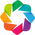

In [1]:
import bokeh.plotting as bpl
import cv2
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil
import json

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt
from caiman.base.movies import play_movie

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        # get_ipython().run_line_magic('matplotlib', 'qt')  #uncomment to run in qt mode
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass

bpl.output_notebook()
hv.notebook_extension('bokeh')

# for vis
import tifffile
from ipywidgets import IntSlider, VBox
import fastplotlib as fpl
from caiman.motion_correction import high_pass_filter_space
from caiman.summary_images import correlation_pnr

Set up logger and environment variables

In [2]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables in case they weren't already set
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

# Define your working directory!

#### OPTION 1

Use this option if you ran "TrimMovie" (of course you would have needed to also run "avi_to_tif".

`movie_path = r'.../full_movie_mod.tif'`

Here is an example:

`movie_path = r'/Users/js0403/miniscope/PFC-Neurons/122D/AAV2/3-Syn-GCaMP8f/2024_02_06/12_21_26/miniscopeDeviceName/full_movie_mod.tif'`

## OPTION 2 (RECOMMENDED OPTION!)

Use this option if you want the easiest play through possible! This does NOT require decode_lab_code github download

`movie_path = r'.../miniscopeDeviceName'`
    
Where /miniscopeDeviceName is the folder containing your .avi files!! 

Here is an example of where my .avi files were saved:

`/Users/js0403/miniscope/PFC-Neurons/122D/AAV2/3-Syn-GCaMP8f/2024_02_06/12_21_26/miniscopeDeviceName`


In [3]:
# PFC NEURONS - GREAT ONE
movie_path = r'/Users/js0403/miniscope/PFC-Neurons/122D/AAV2/3-Syn-GCaMP8f/2024_03_05/12_51_33/miniscopeDeviceName'

if '.tif' in movie_path:
    print("Detected fullpath to movie in movie_path. Loading data...")

    # automatically retrieve the sampling rate
    root_dir = os.path.split(movie_path)[0]
    contents_dir = os.listdir(root_dir)
    metadata_dir = os.path.join(root_dir,[i for i in contents_dir if '.json' in i][0])
    metadata = json.load(open(metadata_dir))
    fr = metadata['frameRate']

    # load movie
    #movie_orig = cm.load(movie_path) # subindices
    movie_orig = tifffile.memmap(movie_path)
    
    # use this to save data later
    if '.avi' in movie_path:
        save_name = movie_path.split('.avi')[0]
    elif '.tif' in movie_path:
        save_name = movie_path.split('.tif')[0]
else:
    print("No movie detected in movie_path, therefore performing iterative search and movie_chain load...")
   
    # Enter the directory containing your miniscope data and let magic happen!
    root_dir = movie_path; del movie_path
    
    # dont change
    contents_dir = os.listdir(root_dir) # get directory contents
    metadata_dir = os.path.join(root_dir,[i for i in contents_dir if '.json' in i][0]) # metadata files
    metadata = json.load(open(metadata_dir)) # load metadata
    fr = metadata['frameRate'] # define framerate
    
    # discover .avi or .tif 
    movie_chain = [i for i in contents_dir if '.avi' in i] # identify .tif or .avi files
    path_chain = [os.path.join(root_dir,i) for i in movie_chain] # combines your movie chain with the root directory to discover movies

    # reduce to native .avi save-out used by miniscope. Because our processing creates tifs, we can assume .avi is the original file
    movie_orig = cm.load_movie_chain(path_chain,fr=fr)
    
    # use this to save data later
    save_name = os.path.join(root_dir,'movie_chain')


No movie detected in movie_path, therefore performing iterative search and movie_chain load...


100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.78s/it]


> When adapting this demo for your data make sure to store the full path to your movie in the `movie_path` variable. Also, for reasons we will explain below, the memory requirement of the CNMF-E algorithm are much higher compared to the CNMF algorithm. If your datasets are too large, you might need to use our online algorithms. We discuss this more in `demo_pipeline.ipynb`. 

# Load and visualize raw data
We visualize using the built-in movie object, which is described in detail in `demo_pipeline.ipynb`. In addition to neural activity, you can also see blood flow through blood vessels in the movie. Such background activity, standard for 1p data, brings new analysis challenges. 

In [4]:
# input movie will be shown on left, filtered on right
iw_mov = fpl.ImageWidget(
    data=movie_orig,
    names="Movie",
    grid_plot_kwargs={"size": (400, 400)},
    cmap="gray" #gnuplot2
)

# add a column to overlay functional activity on structural video
iw_mov.show(sidecar=True)

RFBOutputContext()

/Users/js0403/anaconda3/envs/caiman/lib/python3.11/site-packages/fastplotlib/graphics/_features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='400px', css_width='400px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)'))), Ipywi

# Set up multicore processing
To enable parallel computing we will enable multiple CPUs for processing. The resulting `cluster` variable contains the pool of processors (CPUs) that will be used in later steps. If you use `dview=cluster` in later steps, then parallel processing will be used. If you use `dview=None` then no parallel processing will be used. The `num_processors_to_use` variable determines how many CPU cores you will use (when set to `None` it goes to the default of one less than the number available):

If you have already set up multiprocessing (the `cluster` variable is already in your namespace), then that cluster will be closed and a new one created.

In [4]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

You have 12 CPUs available in your current environment
Setting up new cluster
Successfully set up cluster with 11 processes


# Define parameters
We first set some parameters related to the data and motion correction and create a `params` object. We'll modify this parameter object later on with settings for source extraction. You can also set all the parameters at once as demonstrated in the `demo_pipeline.ipynb` notebook.

Note here we are setting `pw_rigid` to `False`, as our data seems to mainly contain large-scale translational motion. We can always redo this later if it turns out to be a mistake.

In [5]:
# create a slider for gSig_filt
slider_gsig_filt = IntSlider(value=3, min=1, max=33, step=1,  description="gSig_filt")

def apply_filter(frame):
    # read slider value
    gSig_filt = (slider_gsig_filt.value, slider_gsig_filt.value)
    
    # apply filter
    return high_pass_filter_space(frame, gSig_filt)

# we can use frame_apply feature of `ImageWidget` to apply 
# the filter before displaying frames
funcs = {
    # data_index: function
    1: apply_filter  # filter shown on right plot, index 1
}

# input movie will be shown on left, filtered on right
iw_gs = fpl.ImageWidget(
    data=[movie_orig, movie_orig.copy()],
    frame_apply=funcs,
    names=["raw", "filtered"],
    grid_plot_kwargs={"size": (800, 400)},
    cmap="gray"
)

def force_update(*args):
    # kinda hacky but forces the images to update 
    # when the gSig_filt slider is moved
    iw_gs.current_index = iw_gs.current_index
    iw_gs.reset_vmin_vmax()

iw_gs.reset_vmin_vmax()
slider_gsig_filt.observe(force_update, "value")

# add a column to overlay functional activity on structural video
VBox([iw_gs.show(), slider_gsig_filt])
#iw_gs.show(sidecar=True)

RFBOutputContext()

/Users/js0403/anaconda3/envs/caiman/lib/python3.11/site-packages/fastplotlib/graphics/_features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


### Get data from plot above

In [6]:
gSig_val = int(slider_gsig_filt.value)
iw_gs.close()
slider_gsig_filt.close()
print("Closing fig...")

print("Gaussian blur of:",gSig_val)

Closing fig...
Gaussian blur of: 6


# Before CNMFE, we must define correlation and peak-to-noise ratio values

### The code below will provide an interactive window to define your corr and pnr minimum values for CNMFE. You should be looking to find cell shapes out of your data

<div class="alert alert-info">
    <h2>CNMFE initialization: More on correlation and peak-to-noise-ratio</h2>
     <img src="../../docs/img/mn_centered_gaussian.jpg" align="right" width="200"></img>
How are correlation and peak-to-noise ratio actually calculated? First Caiman convolves the motion corrected movie with a <i>mean-centered Gaussian</i> (example to the right). The sigma of the Gaussian is <em>gSig</em>, and mean centering is turned on by setting <em>center_psf</em> to <em>True</em>. This mean centering creates a Gaussian with a positive peak in the middle of width <i>approximately</i> <em>gSig/2</em>, surrounded by a negative trench, and a ledge of zeros around the outer edges. This crucial preprocessing filter serves to highlight neuronal peaks and smooth away low-frequency background activity.

The function <em>correlation_pnr()</em> applies this mean-centered Gaussian to each frame of the motion corrected movie and returns the correlation image of that movie, as well as the peak-to-noise-ratio (PNR). The correlation image is the correlation of each pixel with its neighbors. The PNR is the ratio of the maximum magnitude at a pixel to the noise value at that pixel (it is a fast and rough measure of signal-to-noise). As mentioned above, both of these values tend to be higher in pixels that contain neurons. The CNMFE initialization procedure is to set a threshold for both quantities, take their <i>product</i>, and use the peaks in this product map to find <b>seed pixels</b> for initialization of the CNMFE source separation algorithm.

More details on the initialization procedure used here can be found in the <a href="https://elifesciences.org/articles/28728">CNMFE paper</a>, or by exploring the code.         
</div>

ONLY ADJUST THE BOTTOM END OF THE BAR

In [7]:
# downsample factor
downsample_factor = int(fr/2) # use this to downsample your data for improved computation time during spatial correlation estimation

# get spatial correlation (corr) and peak-to-noise-ratio (pnr) values
corr, pnr = correlation_pnr(movie_orig[::downsample_factor], gSig=gSig_val, swap_dim=False)

# to show the correlation and pnr images
iw_corr_pnr = fpl.ImageWidget(
    [corr, pnr], 
    names=["corr", "pnr"],
    grid_plot_kwargs={"size": (650, 300)},
    cmap="turbo",
)

# sync the threshold image widget with the corr-pnr plot
threshold_grid_plot_kwargs = {
    "controllers": [[iw_corr_pnr.gridplot["corr"].controller]*2]*2,
    "size": (650, 600)
}

VBox([iw_corr_pnr.show()])

RFBOutputContext()

In [8]:
corr_pnr = {
    'min_corr': np.round(iw_corr_pnr.gridplot["corr"].graphics[0].cmap.vmin,2), # corr value from previous plot
    'min_pnr': np.round(iw_corr_pnr.gridplot["pnr"].graphics[0].cmap.vmin,2),  # PNR value from previous plot
}
print(corr_pnr)

print("Closing fig...")
iw_corr_pnr.close()

{'min_corr': 0.8, 'min_pnr': 5.09}
Closing fig...


# Define strides and overlap

Patch width: 401 , Stride: 300, Overlap: 101


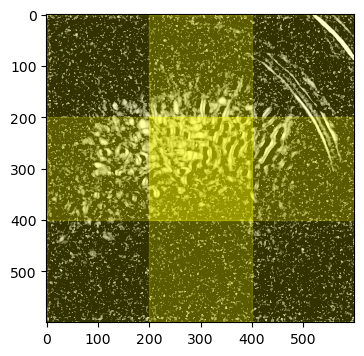

In [9]:
# params
rf = 200 # was 60, was 150 for cnmfe on 122D

# define stride (cnmfe refers to overlap, but mot correction refers to starting new patch every n pixels
stride = int(rf/2)

# calculate stride and overlap from parameters
cnmfe_patch_width = rf*2 + 1
cnmfe_patch_overlap = stride + 1
cnmfe_patch_stride = cnmfe_patch_width - cnmfe_patch_overlap
print(f'Patch width: {cnmfe_patch_width} , Stride: {cnmfe_patch_stride}, Overlap: {cnmfe_patch_overlap}');

# plot the patches
patch_ax = view_quilt(corr, 
                      cnmfe_patch_stride, 
                      cnmfe_patch_overlap, 
                      vmin=np.percentile(np.ravel(corr), 50), 
                      vmax=np.percentile(np.ravel(corr), 99.5),
                      color='yellow',
                      figsize=(4,4));
#fig.savefig(save_name+'_corr_with_patches.eps',format='eps')


In [10]:
if 'path_chain' not in locals():
    path_chain = movie_path

In [11]:
# CHANGE ME IF MOT CORRECTION ISNT WORKING
gSig_filt = (10,10)      # sigma for high pass spatial filter applied before motion correction, used in 1p data, 10,10 for 122D

# dataset dependent parameters
frate = fr                     # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (stride, stride)     # start a new patch for pw-rigid motion correction every x pixels
overlaps = (int(stride/2), int(stride/2))  # overlap between patches (size of patch = strides + overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': path_chain,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

parameters = params.CNMFParams(params_dict=mc_dict)

# Motion Correction
The background signal in micro-endoscopic data is very strong and makes motion correction challenging. As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the lower-frequency background activity and enhance spatial landmarks. The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no preprocessing is performed (default option, used in 2p data for CNMF). 

After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data, not the preprocessed data, so no information is lost before source separation. The motion corrected files are saved in memory mapped format. If no motion correction is performed (i.e., `motion_correct` was set to `False`), then the file gets directly memory mapped.

> For a more detailed exploration of Caiman's motion correction pipeline, see `demo_motion_correction.ipynb`. 

The following also plots the discovered displacements in x- and y- directions.

2024-03-20 09:19:23,901 - WARNING - [movies.py extract_shifts() 341] - pid 1730 - Movie average is negative. Removing 1st percentile.
2024-03-20 09:19:23,908 - WARNING - [movies.py extract_shifts() 359] - pid 1730 - Movie average is negative. Removing 1st percentile.
2024-03-20 09:19:24,448 - WARNING - [movies.py extract_shifts() 341] - pid 1730 - Movie average is negative. Removing 1st percentile.
2024-03-20 09:19:24,456 - WARNING - [movies.py extract_shifts() 359] - pid 1730 - Movie average is negative. Removing 1st percentile.
2024-03-20 09:19:24,997 - WARNING - [movies.py extract_shifts() 341] - pid 1730 - Movie average is negative. Removing 1st percentile.
2024-03-20 09:19:25,006 - WARNING - [movies.py extract_shifts() 359] - pid 1730 - Movie average is negative. Removing 1st percentile.


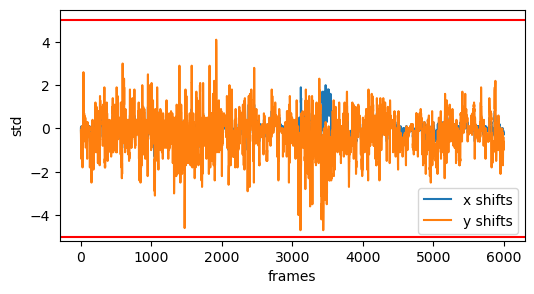

<Figure size 640x480 with 0 Axes>

In [12]:
# check if you chain loaded the movie
if 'path_chain' in locals():
    movie_path = path_chain

# motion correct
mot_correct = MotionCorrect(movie_path, dview=cluster, **parameters.get_group('motion'))
mot_correct.motion_correct(save_movie=True)

# save results
fname_mc = mot_correct.fname_tot_els if pw_rigid else mot_correct.fname_tot_rig
bord_px = 0 if border_nan == 'copy' else bord_px
fname_new = cm.save_memmap(fname_mc, base_name='motioncorr_', order='C',
                           border_to_0=bord_px)

# plot results
bord_px = np.ceil(np.max(np.abs(mot_correct.shifts_rig))).astype(int)
plt.plot(mot_correct.shifts_rig)  # % plot rigid shifts
plt.legend(['x shifts', 'y shifts'])
plt.xlabel('frames')
plt.ylabel('std')
plt.gcf().set_size_inches(6,3)
plt.axhline(y = max_shifts[0], color = 'r', linestyle = '-') 
plt.axhline(y = -1*max_shifts[0], color = 'r', linestyle = '-')
plt.show()        
plt.savefig(save_name+'_XYshifts_motion_correction.eps',format='eps')

Compare original (left panel) and motion corrected movie (right panel). You will notice they look similar, as there wasn't much motion to begin with. You can see from the shift plot (plotted above) that the extracted shifts were all very small.

In [13]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

You have 12 CPUs available in your current environment
Closing previous cluster
Setting up new cluster
Successfully set up cluster with 11 processes


# load memory mapped file, save motion corrected file as .tif and plot results

In [14]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

# save and plot
#mot_path = os.path.join(root_dir,'motionCorrected.tif')
#tifffile.imwrite(mot_path,images)

# load zoomed movie
#zoomed_movie = tifffile.memmap(movie_path)

In [33]:
# Raw movie on the left, motion corrected movie on the right
iw_mot = fpl.ImageWidget(
    data=images,
    names=["Motion Corrected"],
    grid_plot_kwargs={"size": (800, 400)},
    cmap="gray"
)

# add a column to overlay functional activity on structural video
iw_mot.show(sidecar=True)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='400px', css_width='800px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('Motion Corrected',), value='Motion 

# Parameter setting for CNMF-E
Everything is now set up to run source extraction with CNMFE. We will construct a new parameter dictionary and use this to modify the *existing* `parameters` object, using the `change_params()` method.

There are *two* main differences between the CNMF and CNMFE source separation algorithms. The first is the background model (this is discussed in the sidebar below on the Ring Model). The second difference is in how the models are initialized. This is addressed below when we go over setting corr/pnr thresholds for initialization, which we did not have to do for our 2p data.

For now, note that we have set `gnb` to `0`: this is effectively the flag telling Caiman to use CNMFE instead of CNMF. 

<div class="alert alert-info">
    <h2 >CNMF-E: The Ring Model</h2>
   Background activity is very ill-behaved with 1p recordings: it often fluctuates locally and is much larger in magnitude than the neural signals we want to extract. In other words, the large-scale background model used for CNMF is not sufficient for most 1p data. Hence, Pengcheng Zhou and others came up with a localized model of background activity for CNMFE: the background at each pixel is represented as the weighted sum of activity from a circle (or ring) of pixels a certain distance from that pixel. The distance of this ring from the reference pixel is set by the <em>ring_size_factor</em> parameter. This more complex pixel-by-pixel background model explains why CNMFE is computationally more expensive than CNMF, and also why it works better to mop up large-scale localized background noise in  1p data. 
    
When you set <em>gnb</em> in the CNMF model (usually to 1 or 2), you are setting the number of global background components. The fact that you can get away with so few is testament to how well-behaved the background activity is in 2p recordings. When we set <em>gnb</em> to 0 in Caiman, this is a flag telling Caiman's back end to switch to the more complicated ring model of the background activity. 

For more details on CNMFE you can see the <a href="https://elifesciences.org/articles/28728">original paper</a> and the <a href="https://elifesciences.org/articles/38173">Caiman paper</a>. 
</div>

## Key parameters for CNMFE
The key parameters for CNMFE are slightly different than for CNMF, but with some overlap. As we'll see, because of the high levels of background activity, we can't initialize the same way as with CNMF. We have two new important parameters directly related to initialization that come into play: `min_corr` and `min_pnr`. 

`rf` (int): *patch half-width*
> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMFE will be run on the entire field of view.

`stride` (int): *patch overlap*
> `stride` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably have been called 'overlap' instead of 'stride'.

`gSig (int, int)`: *half-width of neurons*
> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). It is the standard deviation of the mean-centered Gaussian used to filter the movie before initialization for CNMFE. It is related to the `gSiz` parameter, which is the width of the entire kernel filter.

`merge_thr (float)`: *merge threshold* 
> If the correlation between two spatially overlapping components is above `merge_thr`, they will be merged into one component. 

`min_corr` (float): *minimum correlation*
> Pixels from neurons tend to be correlated with their neighbors. During initialization, Caiman filters out those pixels below `min_corr` to help select seed pixels. We discuss this more below.

`min_pnr` (float): *minimum peak to noise ratio*
> Pixels from neurons tend to have a high signal-to-noise ratio. During initialization, Caiman filters out those pixels below `min_pnr` to help select seed pixels. We discuss this more below.

In [15]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None for CNMFE
gSig = np.array([gSig_val, gSig_val])  # expected half-width of neurons in pixels 
gSiz = 4*gSig + 1     # half-width of bounding box created around neurons during initialization
merge_thr = .7      # merging threshold, max correlation allowed
rf = rf              # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = stride # amount of overlap between the patches in pixels 
tsub = 2            # downsampling factor in time for initialization, increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization, increase if you have memory problems
gnb = 0             # number of background components (rank) if positive, set to 0 for CNMFE
low_rank_background = None  # None leaves background of each patch intact (use True if gnb>0)
nb_patch = 0        # number of background components (rank) per patch (0 for CNMFE)
min_corr = corr_pnr['min_corr']       # min peak value from correlation image
min_pnr = corr_pnr['min_pnr']       # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background (increase to 2 if slow)
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

# print this out for the user
print('Half-width of neuron:', gSig[0])
print('Half-width of bounding box around neurons during init.:', gSiz[0])

parameters.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # True for 1p
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px});                # number of pixels to not consider in the borders)

Half-width of neuron: 6
Half-width of bounding box around neurons during init.: 25


Initialize the model using the parameters.

In [16]:
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=cluster, 
                        params=parameters)

## Run the CNMF-E algorithm

In [17]:
from datetime import datetime
def dateID():
    id = ''.join(''.join(''.join(datetime.now().strftime("%Y-%m-%d %H:%M:%S").split(':')).split(' ')).split('-'))
    return id

In [ ]:
%%time
cnmfe_model.fit(images);

# get datetime
id = dateID()

# save data
print("Saving CNMFE model...")
save_path =  save_name+'_'+id+'_cnmfe.hdf5'
cnmfe_model.estimates.Cn = corr # squirrel away correlation image with cnmf object
cnmfe_model.save(save_path)

print("Saved to:",save_path)

Running the algorithm creates an `estimates` class, which we discuss in detail in `demo_pipeline.ipynb`. The CNMFE `estimates` class includes almost all the same attributes as with CNMF, such as the neural spatial and temporal components `A` and `C`. 

It also includes the discovered model of background activity, which is different from the CNMF model. For *CNMF* the background model is returned as low-rank matrices `b` and `f`. For CNMFE, the background model parameters are represented in the matrix `W` (the weights of the *ring model* -- discussed above -- for each pixel) as well as `b0` (a constant offset for each pixel). We will show how to reconstruct the background activity below. 

# Clean up open resourses
Shut down server, close logger.

In [23]:
cm.stop_server(dview=cluster)

In [ ]:
# Shut down logger (otherwise will not be able to delete it)
logging.shutdown()